<a href="https://colab.research.google.com/github/dame-demi/DesignOptimization/blob/main/HW_3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.95841967 1.689185  ]
[ 0.00093597 -0.00062248]
A12= 1.95841966952408
A21= 1.6891850023576693


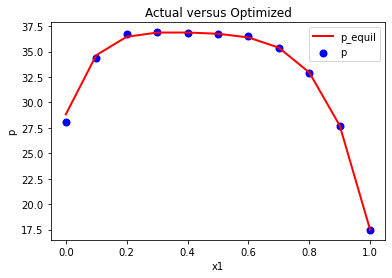

In [43]:
import numpy as np 
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math 

x1=np.arange(0,1.1,0.1)
x2=1-x1
p=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])
a=np.array([[8.07131,1730.63,233.426],
            [7.43155,1554.679,240.337]])
a1=a[:,0]
a2=a[:,1]
a3=a[:,2]
n = len(x1)

def psat(a1,a2,a3):
    return 10**(a1-(a2/(20+a3)))

def pequil(x1,A1,A2):
    x2=1-x1
    return x1*np.exp(A1*(A2*x2/(A1*x1+A2*x2))**2)*psat(8.07131,1730.63,233.426) + x2*np.exp(A2*(A1*x1/(A1*x1+A2*x2))**2)*psat(7.43155,1554.679,240.337)

alpha, beta = optimize.curve_fit(pequil,x1,p)

print(alpha)
print(beta[0])

y=np.zeros(n)
for i in range(n): 
  y[i]=pequil(x1[i],alpha[0],alpha[1])
  
plt.scatter(x1,p,color="blue",label="p",linewidth=2)
plt.plot(x1,y,color="red",label="p_equil",linewidth=2)
plt.xlabel('x1')
plt.ylabel('p')
plt.title('Actual versus Optimized')
plt.legend()
print("A12=",alpha[0])
print("A21=",alpha[1])